# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [27]:
# Импортируем необходимые библиотеки
import pandas as pd  # Для работы с таблицами (DataFrame)
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для более красивых и удобных визуализаций

# Импортируем модуль files из Google Colab для загрузки файлов
from google.colab import files

# Открываем диалоговое окно для загрузки файла из локального компьютера в Google Colab
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (3).csv


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [28]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


Text(0.5, 0.98, 'Результаты экзаменов')

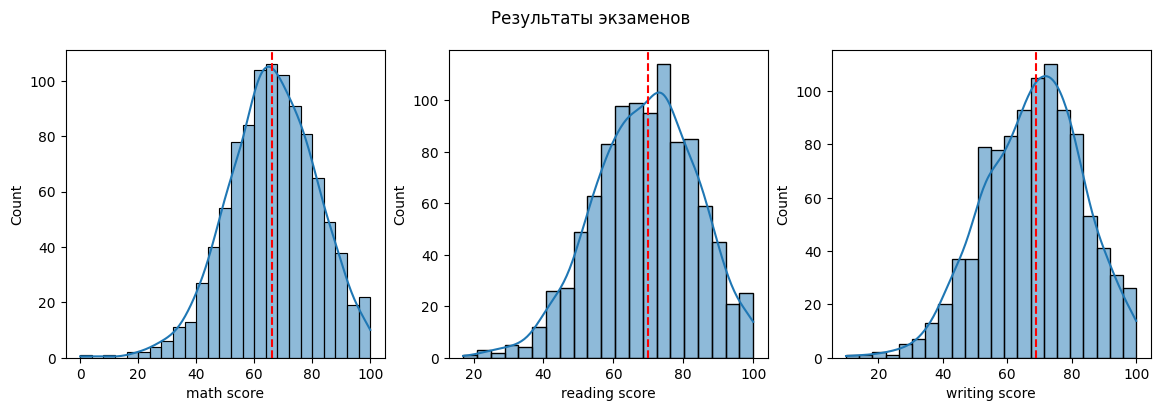

In [29]:
# Вычисляем медианные значения для каждого предмета
math_median = df['math score'].median()      # Медианный балл по математике
reading_median = df['reading score'].median()  # Медианный балл по чтению
writing_median = df['writing score'].median()  # Медианный балл по письму

# Устанавливаем размер всей фигуры: 14 (ширина) на 4 (высота) дюймов
plt.figure(figsize=(14, 4))

# === Гистограмма баллов по математике ===
plt.subplot(1, 3, 1)  # Создаем первый график (из 3), размещаем в первой позиции
sns.histplot(df['math score'], kde=True)  # Гистограмма распределения баллов + KDE-график
plt.axvline(math_median, linestyle='--', color='red')  # Вертикальная линия медианы (красная пунктирная)

# === Гистограмма баллов по чтению ===
plt.subplot(1, 3, 2)  # Второй график (из 3), вторая позиция
sns.histplot(df['reading score'], kde=True)  # Гистограмма распределения баллов + KDE-график
plt.axvline(reading_median, linestyle='--', color='red')  # Вертикальная линия медианы (красная пунктирная)

# === Гистограмма баллов по письму ===
plt.subplot(1, 3, 3)  # Третий график (из 3), третья позиция
sns.histplot(df['writing score'], kde=True)  # Гистограмма распределения баллов + KDE-график
plt.axvline(writing_median, linestyle='--', color='red')  # Вертикальная линия медианы (красная пунктирная)

# Устанавливаем общий заголовок для всех трех графиков
plt.suptitle('Результаты экзаменов')

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

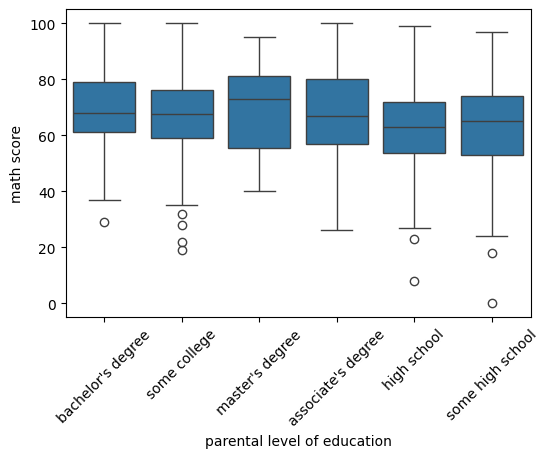

In [16]:
# Вывод количества учеников в каждой категории уровня образования родителей
print(df['parental level of education'].value_counts())

# Создание графика с заданным размером (6x4 дюйма)
plt.figure(figsize=(6, 4))
# Построение boxplot:
# - по оси X — уровень образования родителей
# - по оси Y — баллы по математике
sns.boxplot(x='parental level of education', y='math score', data=df)
# Поворот подписей оси X на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [19]:
# Фильтруем данные: выбираем только тех учеников, которые соответствуют следующим условиям:
# - 'gender' == 'female'  → только девушки
# - 'math score' > 90  → балл по математике выше 90
# - 'reading score' > 90  → балл по чтению выше 90
# - 'writing score' > 90  → балл по письму выше 90
print(df[(df['gender'] == 'female') &
                            (df['math score'] > 90) &
                            (df['reading score'] > 90) &
                            (df['writing score'] > 90)].shape[0])


17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [20]:
from tabulate import tabulate# Импортируем библиотеку для красивого вывода таблиц в консоли

# Группируем данные по признаку 'gender' (пол) и вычисляем статистику
grouped_df = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'], # Минимум, максимум и медиана по математике
    'reading score': ['min', 'max', 'median'], # Минимум, максимум и медиана по чтению
    'writing score': ['min', 'max', 'median'] # Минимум, максимум и медиана по письму
})

# Выводим результат в удобном табличном формате
# - .transpose() меняет местами строки и столбцы для лучшей читаемости
# - headers='keys' использует названия столбцов как заголовки
# - tablefmt='plane' задает формат вывода таблицы без лишних символов
print(tabulate(grouped_df.transpose(), headers='keys', tablefmt='plane'))


                               female    male
---------------------------  --------  ------
('math score', 'min')               0      27
('math score', 'max')             100     100
('math score', 'median')           65      69
('reading score', 'min')           17      23
('reading score', 'max')          100     100
('reading score', 'median')        73      66
('writing score', 'min')           10      15
('writing score', 'max')          100     100
('writing score', 'median')        74      64


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [21]:
# Создаем новый столбец 'average score', который содержит средний балл по трем предметам
# - Используем df[['math score', 'reading score', 'writing score']].mean(axis=1)
# - axis=1 означает, что среднее считается по строкам (для каждого ученика)
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Группируем данные по трем параметрам:
# - 'gender' (пол)
# - 'lunch' (тип обеда: стандартный или льготный)
# - 'test preparation course' (прошел ли студент подготовительный курс перед тестом)
# Для каждой группы вычисляем средний балл ('average score': 'mean')
print(df.groupby(['gender', 'lunch', 'test preparation course']).agg({'average score': 'mean'}).reset_index())


   gender         lunch test preparation course  average score
0  female  free/reduced               completed      69.528571
1  female  free/reduced                    none      59.501401
2  female      standard               completed      77.479532
3  female      standard                    none      70.961240
4    male  free/reduced               completed      65.721311
5    male  free/reduced                    none      58.323810
6    male      standard               completed      73.513274
7    male      standard                    none      65.486043


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

([0, 1, 2, 3, 4],
 [Text(0, 0, 'group B'),
  Text(1, 0, 'group C'),
  Text(2, 0, 'group A'),
  Text(3, 0, 'group D'),
  Text(4, 0, 'group E')])

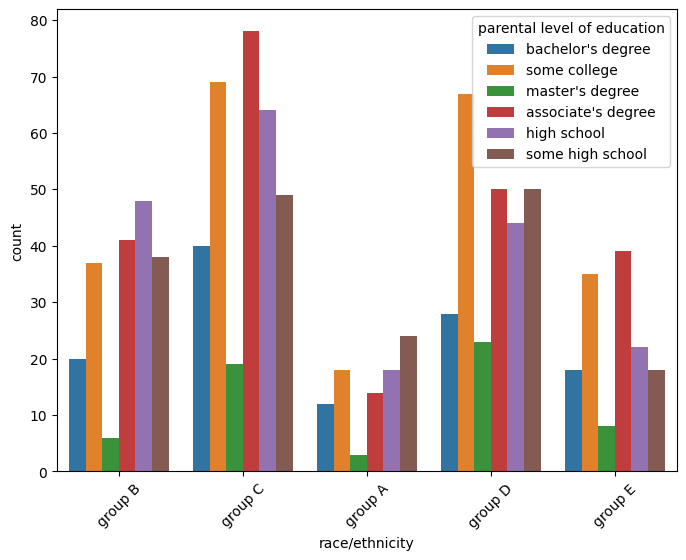

In [22]:
# Устанавливаем размер графика: 8 (ширина) на 6 (высота) дюймов
plt.figure(figsize=(8, 6))
# Строим столбчатую диаграмму, показывающую количество учеников разной расы/этнической группы,
# разделенных по уровню образования родителей (используем цветовую группировку - hue)
sns.countplot(x='race/ethnicity', hue='parental level of education', data=df)
# Поворачиваем подписи категорий на оси X на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

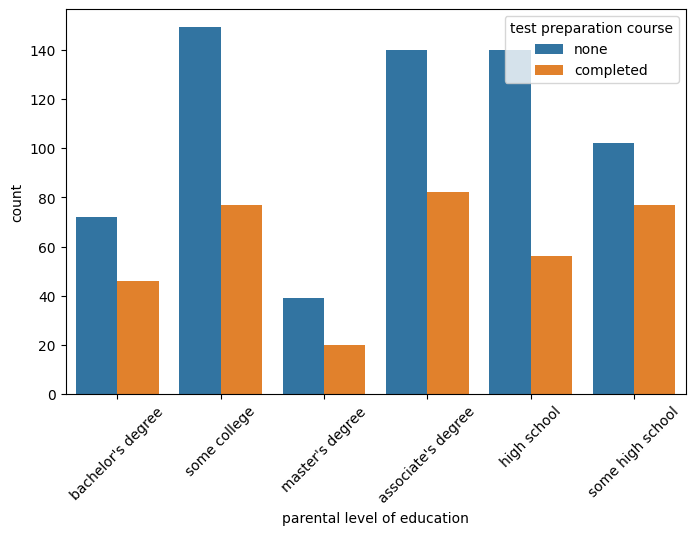

In [23]:
# Устанавливаем размер графика: 8 (ширина) на 5 (высота) дюймов
plt.figure(figsize=(8, 5))
# Строим столбчатую диаграмму (countplot), показывающую количество учеников в каждой категории уровня образования родителей,
# с разделением по признаку прохождения подготовительного курса (hue='test preparation course')
sns.countplot(x='parental level of education', hue='test preparation course', data=df)
# Поворачиваем подписи на оси X на 45 градусов для лучшей читаемости
plt.xticks(rotation=45)


#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

([<matplotlib.patches.Wedge at 0x7f361c215f90>,
 [Text(-1.0913261621521642, 0.13786663048841244, 'сдал'),
  Text(1.0913261524711573, -0.13786670712140953, 'не сдал')],
 [Text(-0.5952688157193622, 0.07519998026640679, '96.0%'),
  Text(0.595268810438813, -0.07520002206622338, '4.0%')])

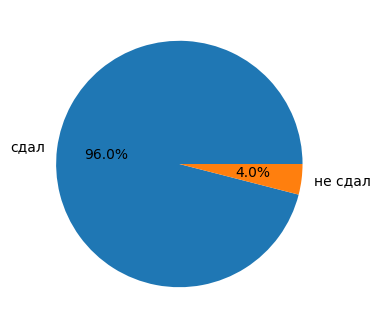

In [ ]:
# Создаем новый столбец 'math_passed', в котором указываем, сдал ли ученик экзамен по математике
# - Используем apply() для применения функции к каждому значению столбца 'math score'
# - Если балл >= 40, ученик "сдал", иначе "не сдал"
df['math_passed'] = df['math score'].apply(lambda x: 'сдал' if x >= 40 else 'не сдал')

# Подсчитываем количество учеников, которые сдали и не сдали экзамен
pass_counts = df['math_passed'].value_counts()

# Устанавливаем размер графика 4x4 дюйма
plt.figure(figsize=(4, 4))
# Строим круговую диаграмму:
# - 'pass_counts' содержит количество сдавших и не сдавших
# - labels=pass_counts.index указывает метки (сдал/не сдал)
# - autopct='%1.1f%%' отображает проценты с точностью до 1 знака после запятой
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%')


#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

([<matplotlib.patches.Wedge at 0x7f361bc9dc10>,
 [Text(0.7530018405458981, 0.8018654676031947, 'C'),
  Text(-0.8319413552117229, 0.719634338736335, 'B'),
  Text(-0.7222444093188906, -0.8296764509178305, 'D'),
  Text(0.5359750498000468, -0.9605887496696166, 'A'),
  Text(0.9893457241866406, -0.48082745141434247, 'O'),
  Text(1.088030675927726, -0.16183092485756742, 'E')],
 [Text(0.41072827666139894, 0.437381164147197, '26.0%'),
  Text(-0.45378619375184875, 0.39252782112891, '25.3%'),
  Text(-0.3939514959921221, -0.45255079140972565, '24.6%'),
  Text(0.2923500271636619, -0.5239574998197908, '14.4%'),
  Text(0.5396431222836221, -0.2622695189532777, '5.0%'),
  Text(0.5934712777787596, -0.08827141355867313, '4.7%')])

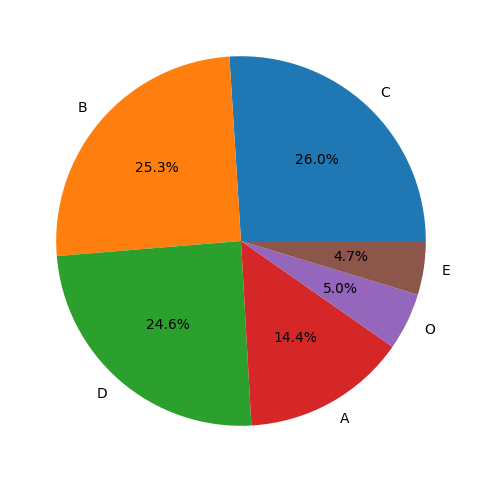

In [24]:
# Создаем новый столбец 'average score', который содержит средний балл по трем предметам
# - axis=1 означает, что среднее считается по строкам (для каждого ученика)
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Функция для присвоения оценки в зависимости от баллов
def assign_grade(row):
  # Если по математике меньше 40 баллов — сразу ставим оценку 'E'
    if row['math score'] < 40:
        return 'E'
  # Если средний балл меньше или равен 40 — тоже 'E'
    elif row['average score'] <= 40:
        return 'E'
  # Средний балл от 41 до 60 — оценка 'D'
    elif row['average score'] <= 60:
        return 'D'
  # Средний балл от 61 до 70 — оценка 'C'
    elif row['average score'] <= 70:
        return 'C'
  # Средний балл от 71 до 80 — оценка 'B'
    elif row['average score'] <= 80:
        return 'B'
  # Средний балл от 81 до 90 — оценка 'A'
    elif row['average score'] <= 90:
        return 'A'
  # Средний балл выше 90 — высшая оценка 'O'
    else:
        return 'O'

# Применяем функцию assign_grade() к каждой строке DataFrame и записываем оценки в новый столбец 'grade'
df['grade'] = df.apply(assign_grade, axis=1)

# Подсчитываем количество учеников в каждой категории оценки
grade_counts = df['grade'].value_counts()

# Устанавливаем размер графика 8x6 дюймов
plt.figure(figsize=(8, 6))
# Строим круговую диаграмму:
# - 'grade_counts' содержит количество учеников в каждой оценочной категории
# - labels=grade_counts.index указывает метки (оценки: E, D, C, B, A, O)
# - autopct='%1.1f%%' отображает проценты с точностью до 1 знака после запятой
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%')



#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

<Axes: xlabel='grade', ylabel='count'>

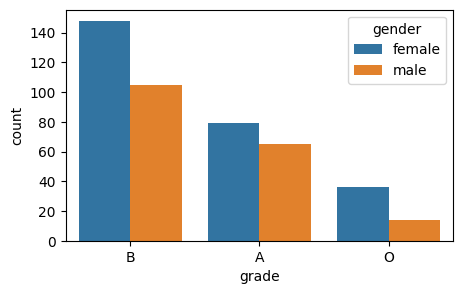

In [25]:
# Функция для присвоения оценки в зависимости от среднего балла и балла по математике
def assign_grade(row):
    if row['math score'] < 40:  # Если балл по математике меньше 40, сразу ставим 'E'
        return 'E'
    elif row['average score'] <= 40:  # Если средний балл не превышает 40, ставим 'E'
        return 'E'
    elif row['average score'] <= 60:  # Средний балл от 41 до 60 — оценка 'D'
        return 'D'
    elif row['average score'] <= 70:  # Средний балл от 61 до 70 — оценка 'C'
        return 'C'
    elif row['average score'] <= 80:  # Средний балл от 71 до 80 — оценка 'B'
        return 'B'
    elif row['average score'] <= 90:  # Средний балл от 81 до 90 — оценка 'A'
        return 'A'
    else:  # Средний балл выше 90 — высшая оценка 'O'
        return 'O'

# Проверяем, есть ли столбец 'average score' в DataFrame, если нет — создаем его
if 'average score' not in df.columns:
    df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Проверяем, есть ли столбец 'grade' в DataFrame, если нет — создаем его
if 'grade' not in df.columns:
    df['grade'] = df.apply(assign_grade, axis=1)

# Фильтруем DataFrame: оставляем только учеников, у которых оценки 'O', 'A' или 'B'
filtered_df = df[df['grade'].isin(['O', 'A', 'B'])]

# Устанавливаем размер графика 5x3 дюйма
plt.figure(figsize=(5, 3))

# Строим столбчатую диаграмму (countplot):
# - x='grade' → оценки O, A, B на оси X
# - hue='gender' → группируем по полу (разные цвета)
# - data=filtered_df → используем отфильтрованные данные
sns.countplot(x='grade', hue='gender', data=filtered_df)